# CBE-410 Heat Exchanger Data Analysis

19 September 2020

Chase Novak

Thomas Vasquez

Ashwin Koul

## Problem 1

Temperature dependencies were found using the curve fit tool in Matlab for the density, viscosity, and thermal conductivity. A constant value of 4067 $\frac{J}{kgK}$ was used for the heat capacity as this property did not vary much over the experimental temperature range. The fluid properties' temperature dependencies can be seen in Figure 1.

## Problem 2

To calculate the heat lost of the hot and cold fluids, the equation $\dot{q} = \dot{m} \cdot C_p \cdot \Delta T$ was used. The heat lost was the difference of $q_{hot}$ and $q_{cold}$. The magnitude of the heat lost by the system depends on the magnitude of the ambient temperature and the cold fluid's temperture.

## Problem 3

The experimental overall heat transfer coefficient, U, was calculated using the equation $U_{exp} = q_{hot} \cdot A_{avg} \cdot \Delta T_{lm}$, where $A_{avg}$ is equal to the average of the heat transfer areas.

## Problem 4

The Reynolds number and the Prandtl numbers were calcluated using the fluid properties and flow rates. In the annulus, the flow is laminar, and on the tube-side, the flow is transitional. 

Because the flow on the tube-side was transitional, $50 \cdot D_h$ was used to calculate the hydrodynamic entry length and $10 \cdot D_h$ was used to calculate the thermal entry length. Because the flow in the annulus was laminar, $0.05 \cdot Re \cdot D_c$ was used to calculate the hydrodynamic entry length, and $0.05 \cdot Re \cdot D_c \cdot Pr$ was used to calculate the thermal entry length. 

Equations 8.62 and 8.21 were used to calculate the Nusselt number for the tube-side. These correlations were chosen despite the flow not being fully-developed because its the only correlation that satisfies the Reynolds number criteria as well as the additional criteria.

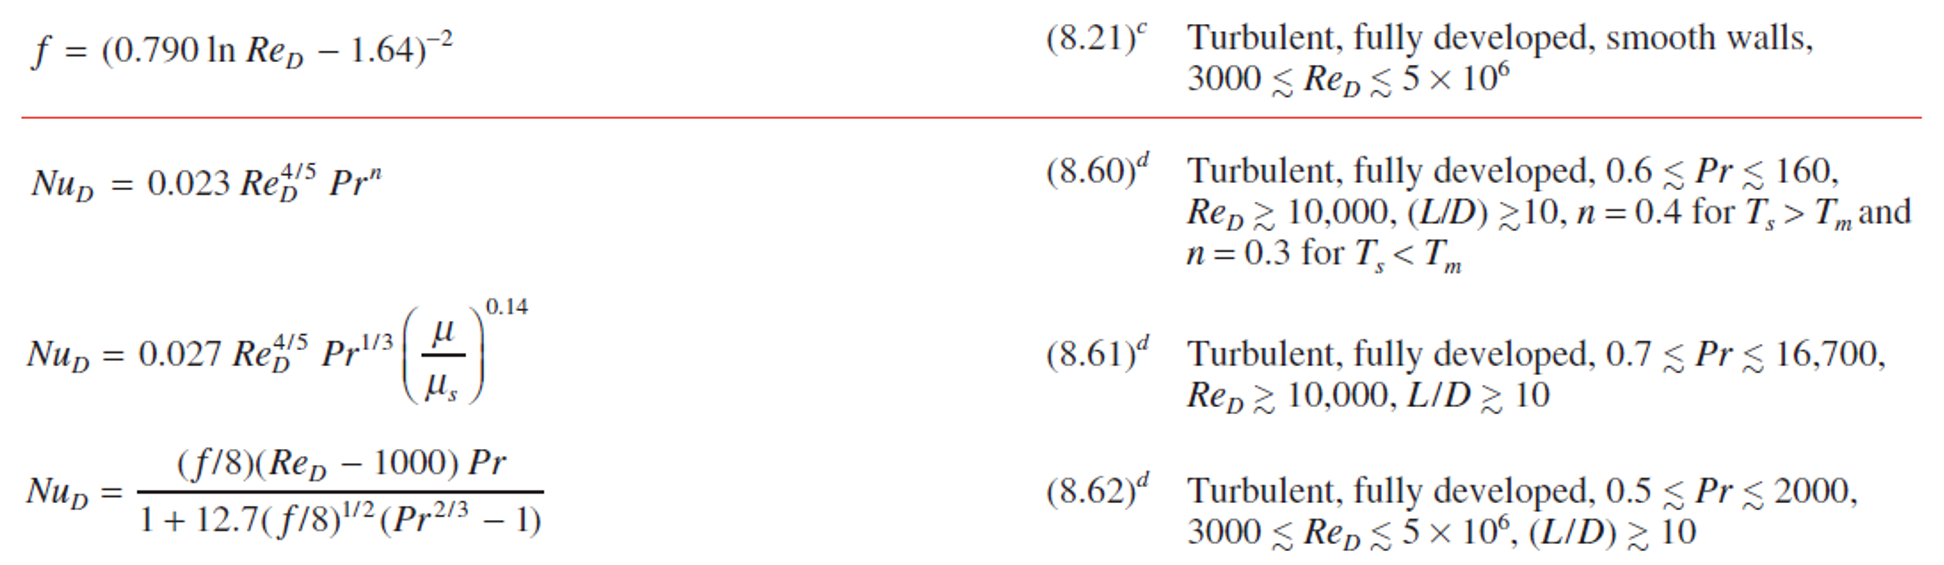

The flow throught the annulus was laminar and thermally developing. Equation 4 (contstant wall temperature) was used for the parallel flow cases, and Equation 5 (constant wall heat flux) was used for the counter flow cases. However, these equations assume the flow is through a circular tube, so Equation 12 was then used to correct for annular flow.

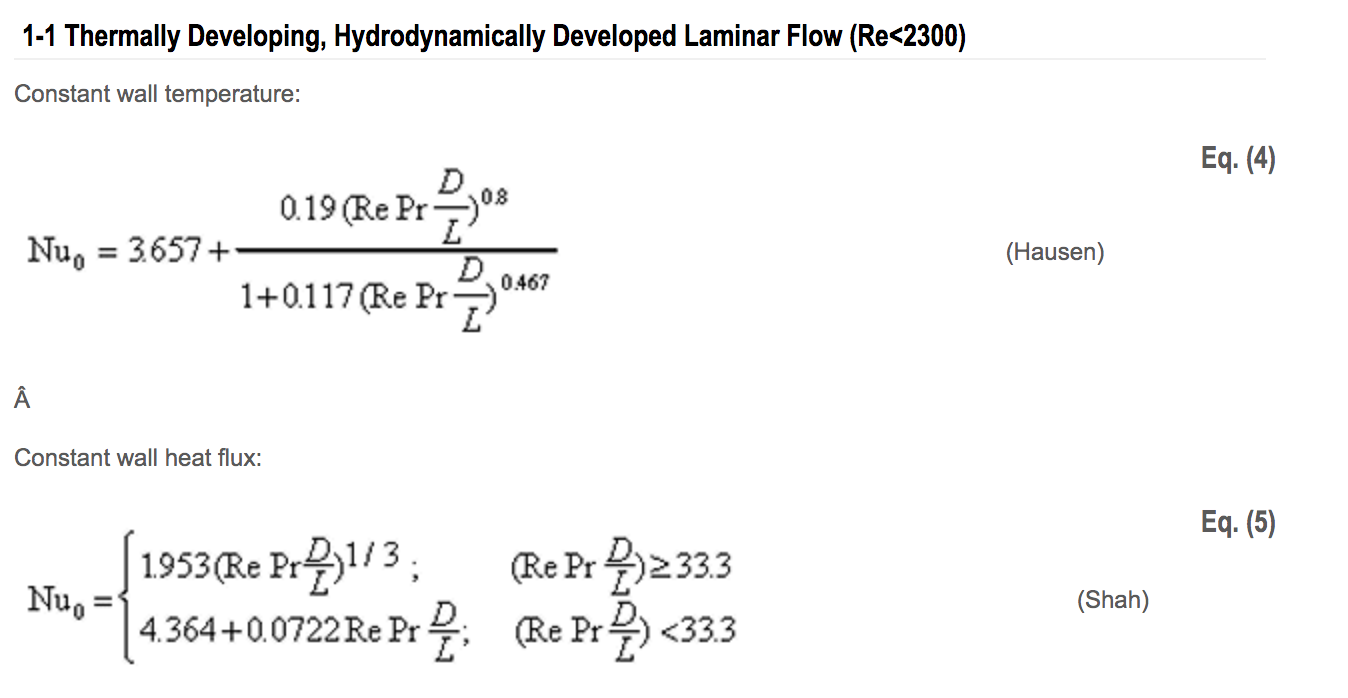

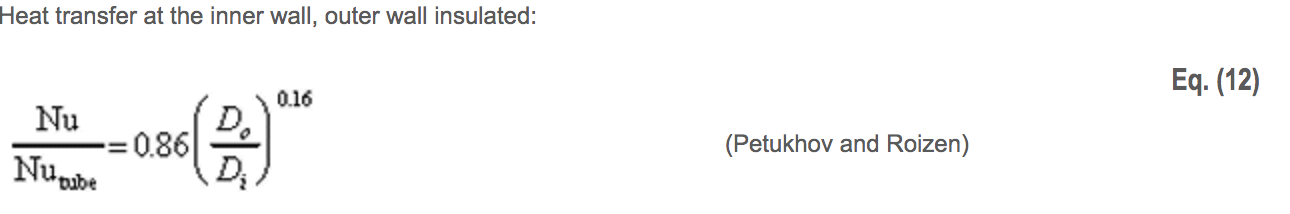



## Problem 5

Convective heat transfer coffecients were calculated using the Nusselt number correlation and the equation $Nu = \frac{hD}{k_f}$. The resistances for the tube-side and shell-side were calculated using $\frac{1}{hA}$ and the wall resistance was calculated using $R_{wall} = \frac{\ln{\frac{D_o}{D_i}}}{2\pi kL}$.

To improve the heat transfer of this exchanger, insulation could be added to the outer tube to mitigate the cold fluid's heat loss to the environment.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.optimize import curve_fit
from matplotlib.ticker import FormatStrFormatter

# hide matplotlib deprecation warning
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [2]:
# importing all of the data from the Excel file

url = "https://github.com/chasenovak17/cbe410/raw/master/Raw%2BHeat%2BExchanger%2BData.xlsx"
excel_data = pd.read_excel(url, sheet_name = "Raw Data - Error", header = None)

excel_data = excel_data.values

hot_res = excel_data[3:-2, 1]
hot_in = excel_data[3:-2, 2]
hot_mid = excel_data[3:-2, 3]
hot_out = excel_data[3:-2, 4]
cold_out = excel_data[3:-2, 5]
cold_mid = excel_data[3:-2, 6]
cold_in = excel_data[3:-2, 7]
hot_flow = excel_data[3:-2, 8]
cold_flow = excel_data[3:-2, 9]
avg_hot = excel_data[3:-2, 10]
avg_cold = excel_data[3:-2, 11]
rho_hot = excel_data[3:-2, 12]
rho_cold = excel_data[3:-2, 13]
mass_hot = excel_data[3:-2, 14]
mass_cold = excel_data[3:-2, 15]
mass_hot_error = excel_data[3:-2, 16] 
mass_cold_error = excel_data[3:-2, 17] 
q_hot = excel_data[3:-2, 18] 
q_cold = excel_data[3:-2, 19] 
q_loss = excel_data[3:-2, 20] 
q_hot_error = excel_data[3:-2, 21] 
deltaT_left = excel_data[3:-2, 22]
deltaT_right = excel_data[3:-2, 23]
deltaT_error = excel_data[3:-2, 24]
deltaT_lm = excel_data[3:-2, 25] 
df_over_dTleft = excel_data[3:-2, 26]
df_over_dTright = excel_data[3:-2, 27]
deltaT_lm_error = excel_data[3:-2, 28] 
UA_hot_exp = excel_data[3:-2, 29] #
UA_cold_exp = excel_data[3:-2, 30] # 
UA_exp_error = excel_data[3:-2, 31]
Uh = excel_data[3:-2, 32] #
Uc = excel_data[3:-2, 33] #
U_avg = excel_data[3:-2, 34] #
U_exp = excel_data[3:-2, 35] 
U_exp_error = excel_data[3:-2, 36] 
u_hot = excel_data[3:-2, 37]
u_cold = excel_data[3:-2, 38]
Dh_hot = excel_data[3:-2, 39]
Dh_cold = excel_data[3:-2, 40]
mu_hot = excel_data[3:-2, 41]
mu_cold = excel_data[3:-2, 42]
Re_hot = excel_data[3:-2, 43]
Re_cold = excel_data[3:-2, 44]
k_hot = excel_data[3:-2, 45]
k_cold = excel_data[3:-2, 46]
Pr_hot = excel_data[3:-2, 47]
Pr_cold = excel_data[3:-2, 48]
xfd_h_hot = excel_data[3:-2, 49]
xfd_t_hot = excel_data[3:-2, 50]
xfd_h_cold = excel_data[3:-2, 51]
xfd_t_cold = excel_data[3:-2, 52]
f_hot = excel_data[3:-2, 53]
Nu_hot = excel_data[3:-2, 54]
h_hot = excel_data[3:-2, 55]
RePrD_over_L = excel_data[3:-2, 56]
Nu_tube_cold = excel_data[3:-2, 57]
Nu_cold = excel_data[3:-2, 58]
h_cold = excel_data[3:-2, 59]
R_hot = excel_data[3:-2, 60]
R_cold = excel_data[3:-2, 61]
R_tube = excel_data[3:-2, 62]
UA_theory = excel_data[3:-2, 63]
U_theory = excel_data[3:-2, 64]

Text(0.15, 0.18, 'P1 = -3.412e-03\nP2 = -1.029e-01\nP3 = 1.001e+03')

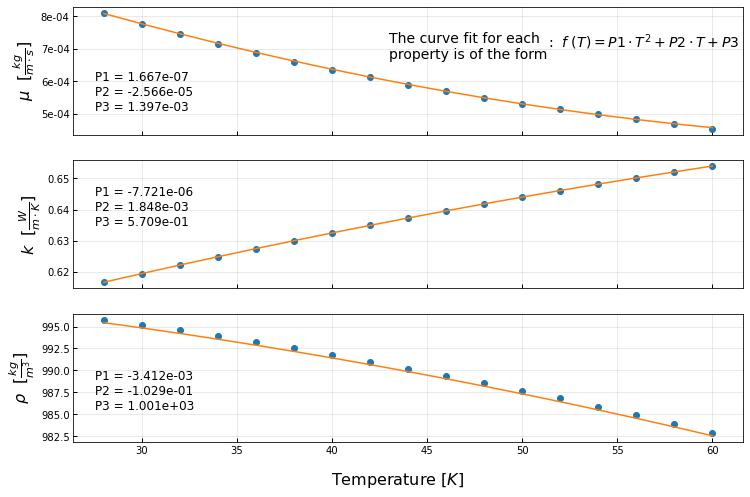

In [3]:
# fluid properties vs. temperature fit
temps = np.linspace(28, 60, 17)
mus_canvas_resource = np.array([0.0008119,0.0007773,0.0007451,0.0007149,0.0006867,0.0006602,0.0006354,0.0006121,0.0005902,0.0005696,0.0005502,0.0005319,0.0005145,0.0004982,0.0004827,0.000468,0.000454])
ks_canvas_resource = np.array([0.6166,0.6194,0.6222,0.6248,0.6274,0.63,0.6325,0.6349,0.6373,0.6396,0.6418,0.644,0.6461,0.6482,0.6502,0.6521,0.654])
rhos_canvas_resource = np.array([995.8,995.2,994.6,993.9,993.2,992.5,991.8,991,990.2,989.4,988.6,987.7,986.8,985.8,984.9,983.9,982.9])


p1_mu = 1.667e-7
p2_mu = -2.566e-5
p3_mu = 1.397e-3
mus_calc = p1_mu*np.power(temps, 2) + p2_mu*temps + p3_mu

p1_k = -7.721e-6
p2_k = 1.848e-3
p3_k = 0.5709
ks_calc = p1_k*np.power(temps, 2) + p2_k*temps + p3_k

p1_rho = -3.412e-3
p2_rho = -0.1029
p3_rho = 1001.0
rhos_calc = p1_rho*np.power(temps, 2) + p2_rho*temps + p3_rho

fig1 = plt.figure(1)
fig1.set_figheight(8)
fig1.set_figwidth(12)
# plt.title("Temperature Effects on Viscosity", FontSize = 18)

ax1 = plt.subplot(311)

line1, = plt.plot(temps, mus_canvas_resource, linestyle = "", marker = "o")

line2, = plt.plot(temps, mus_calc)

plt.ylabel("$\\mu$  $[\\frac{kg}{m \cdot s}]$", FontSize = 16)

ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0e'))

plt.setp(ax1.get_xticklabels(), visible=False)


ax2 = plt.subplot(312, sharex = ax1)

line3, = plt.plot(temps, ks_canvas_resource, linestyle = "", marker = "o")

line4, = plt.plot(temps, ks_calc)

plt.ylabel("$k$  $[\\frac{W}{m \cdot K}]$", FontSize = 16)

plt.setp(ax2.get_xticklabels(), visible=False)


ax3 = plt.subplot(313, sharex = ax1)

line5, = plt.plot(temps, rhos_canvas_resource, linestyle = "", marker = "o")

line6, = plt.plot(temps, rhos_calc)

plt.ylabel("$\\rho$  $[\\frac{kg}{m^3}]$", FontSize = 16)


fig1.text(0.5, 0.05, 'Temperature [$K$]', ha='center', FontSize = 16)

ax1.tick_params('x',direction='in', length=4, width=1, colors='k',
                grid_color='r', grid_alpha=0.5)
ax1.tick_params('y',direction='in', length=4, width=1, colors='k',
                grid_color='r', grid_alpha=0.5)
ax2.tick_params('x',direction='in', length=4, width=1, colors='k',
                grid_color='r', grid_alpha=0.5)
ax2.tick_params('y',direction='in', length=4, width=1, colors='k',
                grid_color='r', grid_alpha=0.5)
ax3.tick_params('x',direction='in', length=4, width=1, colors='k',
                grid_color='r', grid_alpha=0.5)
ax3.tick_params('y',direction='in', length=4, width=1, colors='k',
                grid_color='r', grid_alpha=0.5)
ax1.grid(color = "k", alpha = 0.1)
ax2.grid(color = "k", alpha = 0.1)
ax3.grid(color = "k", alpha = 0.1)

plt.figtext(0.49, 0.79, "The curve fit for each\nproperty is of the form",
            FontSize = 14)
plt.figtext(0.675, 0.81, ":  $ f$ ($T$)$ = P1 \cdot T^2 + P2 \cdot T + P3$",
            FontSize = 14)
plt.figtext(0.15, 0.7, "P1 = " + "%.3e" % (p1_mu) + "\nP2 = " + "%.3e" % (p2_mu) + "\nP3 = " + "%.3e" % (p3_mu), FontSize = 12)
plt.figtext(0.15, 0.5, "P1 = " + "%.3e" % (p1_k) + "\nP2 = " + "%.3e" % (p2_k) + "\nP3 = " + "%.3e" % (p3_k), FontSize = 12)
plt.figtext(0.15, 0.18, "P1 = " + "%.3e" % (p1_rho) + "\nP2 = " + "%.3e" % (p2_rho) + "\nP3 = " + "%.3e" % (p3_rho), FontSize = 12)


Figure 1. Fluid properties vs. Temperature. The 3 fluid properites shown in Figure 1 had significant temperature dependices. The heat capacity, Cp, did not have a significant temperature dependence, and a constant value of 4067 J/kg*K was chosen for it.

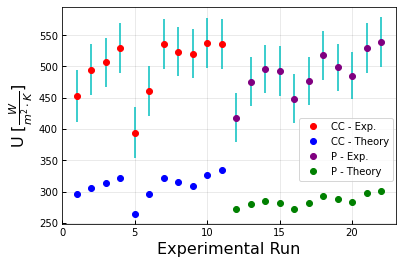

In [4]:
fig2 = plt.figure(2)
line1, = plt.plot(np.linspace(1,11, 11), U_exp[:11], color = "r", 
                  linestyle = "", marker = "o")
plt.errorbar(np.linspace(1,11, 11), U_exp[:11], U_exp_error[:11],
            linestyle = "", color = "c")
line2, = plt.plot(np.linspace(1,11, 11), U_theory[:11], color = "b", 
                  linestyle = "", marker = "o")

line3, = plt.plot(np.linspace(12,22, 11), U_exp[11:], color = "purple", 
                  linestyle = "", marker = "o")
plt.errorbar(np.linspace(12,22, 11), U_exp[11:], U_exp_error[11:],
            linestyle = "", color = "c")
line4, = plt.plot(np.linspace(12,22, 11), U_theory[11:], color = "g", 
                  linestyle = "", marker = "o")
plt.legend(("CC - Exp.", "CC - Theory", "P - Exp.", "P - Theory"), loc = (0.71, 0.2))
# plt.title("Overall Heat Transfer Coefficients", FontSize = 18)
plt.xlabel("Experimental Run", FontSize = 16)
plt.ylabel("U $[\\frac{W}{m^2 \cdot K}]$", FontSize = 16)
plt.tick_params('x',direction='in', length=4, width=1, colors='k',
                grid_color='r', grid_alpha=0.5)
plt.tick_params('y',direction='in', length=4, width=1, colors='k',
                grid_color='r', grid_alpha=0.5)
plt.grid(color = "k", alpha = 0.1)

Figure 2. Overall Heat Transfer Coefficiants. For all runs, the experimental value of U is higher by a factor of ~1.5-2 relative to the theoretical value. The Parallel (P) runs had lower U values than the Counter-Current (CC) runs.

## Problem 6

There is a descrepancy between the theoretical and and experimental overall heat transfer coefficiants due to the cold fluid losing heat to the environment. As a result, the cold fluid in the experimental runs has a greater temperature change than the theoretical calculations would predict. This leads to a higher experimental log-mean temperature difference, and thus, a larger experimental overall heat trasnfer coefficient.

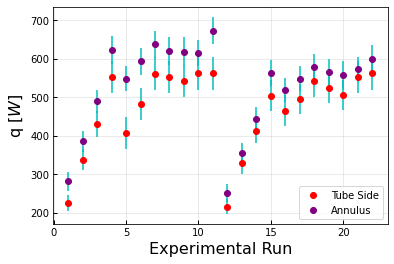

In [5]:
fig3 = plt.figure(3)
line1, = plt.plot(np.linspace(1,22, 22), q_hot, color = "r", 
                  linestyle = "", marker = "o")
plt.errorbar(np.linspace(1,22, 22), q_hot, q_hot_error,
            linestyle = "", color = "c")

# define and calculate q_cold_error
Cp = 4067.0
q_cold_error = np.power(np.power(mass_cold*Cp, 2) * np.power(deltaT_error, 2)
                       + np.power((cold_out - cold_in)*Cp, 2) * np.power(mass_cold_error, 2), 0.5)
# print(q_cold_error)


line2, = plt.plot(np.linspace(1,22, 22), q_cold, color = "purple", 
                  linestyle = "", marker = "o")
plt.errorbar(np.linspace(1,22, 22), q_cold, q_cold_error,
            linestyle = "", color = "c")


plt.legend(("Tube Side", "Annulus"), loc = "lower right")
# plt.title("Heat Exchanged", FontSize = 18)
plt.xlabel("Experimental Run", FontSize = 16)
plt.ylabel("q $[W]$", FontSize = 16)
plt.tick_params('x',direction='in', length=4, width=1, colors='k',
                grid_color='r', grid_alpha=0.5)
plt.tick_params('y',direction='in', length=4, width=1, colors='k',
                grid_color='r', grid_alpha=0.5)
plt.grid(color = "k", alpha = 0.1)

Figure 3. Heat Exchanged in each Experimental Run. The heat transferred from the tube side is lower than the heat transfered from the annulus for all runs. This is likely due to the annulus losing heat to the surroundings as the annulus temperature is higher than the ambient temperature. Because of this, the tube side heat value was chosen as the more representative heat transfer value in calculating the overall heat transfer coefficient.

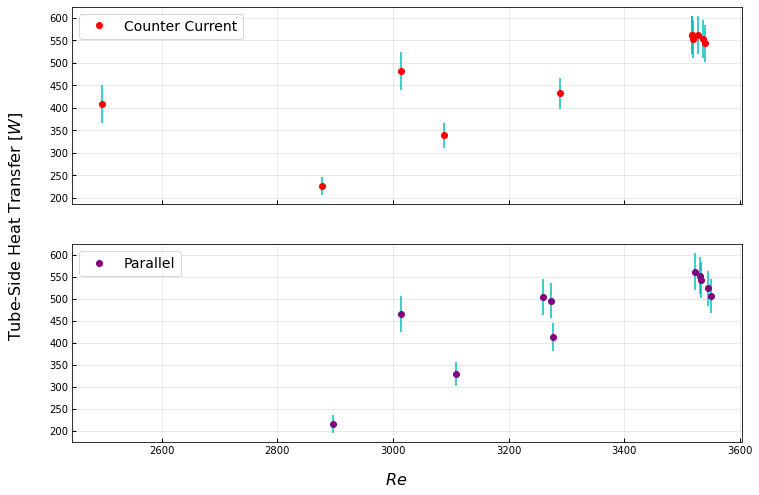

In [6]:
# fig4 = plt.figure(figsize = (15, 10))
# fig4 = plt.figure()
fig4, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
fig4.set_figheight(8)
fig4.set_figwidth(12)
# plot counter current data
line1, = ax1.plot(Re_hot[:11], q_hot[:11], color = "r", 
                  linestyle = "", marker = "o", label = "Counter Current")
ax1.errorbar(Re_hot[:11], q_hot[:11], q_hot_error[:11],
            linestyle = "", color = "c")

# plot parallel data
line2, = ax2.plot(Re_hot[11:], q_hot[11:], color = "purple", 
                  linestyle = "", marker = "o", label = "Parallel")
ax2.errorbar(Re_hot[11:], q_hot[11:], q_hot_error[11:],
            linestyle = "", color = "c")


ax1.legend(loc = "upper left", prop = {'size': 14})
ax2.legend(loc = "upper left", prop = {'size': 14})

# ax1.set_title("Turbulent Effects on Heat Transfer", FontSize = 18)

fig4.text(0.5, 0.05, '$Re$', ha='center', FontSize = 16)
fig4.text(0.05, 0.5, 'Tube-Side Heat Transfer $[W]$', va='center', rotation='vertical',
       FontSize = 16)

ax1.tick_params('x',direction='in', length=4, width=1, colors='k',
                grid_color='r', grid_alpha=0.5)
ax1.tick_params('y',direction='in', length=4, width=1, colors='k',
                grid_color='r', grid_alpha=0.5)
ax2.tick_params('x',direction='in', length=4, width=1, colors='k',
                grid_color='r', grid_alpha=0.5)
ax2.tick_params('y',direction='in', length=4, width=1, colors='k',
                grid_color='r', grid_alpha=0.5)
ax1.grid(color = "k", alpha = 0.1)
ax2.grid(color = "k", alpha = 0.1)

Figure 4. Turbulent Effects on Heat Transfer. As the Reynolds number increases, the tube-side heat transfer increases. This is due to the increasing turbulent effects. As the flow continues further into the transitional region, the heat transfer shows a slight decrease due to the unpredictability of the transitional region.

## Problem 7

See the 4 figures and captions above.